<a href="https://colab.research.google.com/github/Hamza1122/ML_Assignment/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context:

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective:
To predict which customer is more likely to purchase the newly introduced travel package.

##Data Dictionary
**Customer details:**

    1. CustomerID: Unique customer ID
    2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    3. Age: Age of customer
    4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
    6. Occupation: Occupation of customer
    7. Gender: Gender of customer
    8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    9. PreferredPropertyStar: Preferred hotel property rating by customer
    10. MaritalStatus: Marital status of customer
    11. NumberOfTrips: Average number of trips in a year by customer
    12. Passport: The customer has a passport or not (0: No, 1: Yes)
    13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    15. Designation: Designation of the customer in the current organization
    16. MonthlyIncome: Gross monthly income of the customer

### Import the necessary packages

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from xgboost import XGBClassifier

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier,StackingClassifier)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier


### **Read the dataset**

In [33]:
loan_modelling = pd.read_excel('Tourism.xlsx')

In [34]:
# copying data to another varaible to avoid any changes to original data
data=loan_modelling.copy()

### **View the first and last 10 rows of the dataset.**

In [35]:
data.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [36]:
data.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### **Understand the shape of the dataset.**

In [37]:
data.shape

(4888, 20)

* Dataset has 4888 rows and 20 columns

### Let's check the duplicate data. And if any, we should remove it.

In [38]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### As we can see there is no duplicate values

### **Check the data types of the columns for the dataset.**

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### **Check for missing values**

In [40]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* There are missing values in the data.

**Give a statistical summary for the dataset.**

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observation:**

* Maximum monthly income of person is around 98678$.
* Maximum Age of a person in a bank is 61 years old.
* Maximum number of trip is 22.
* Average Number of Children Visiting is 1.18
* Average rating of Property star is 3.58

In [42]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

**On the basis of number of unique values we can seperate the continuous and categorical data**



In [43]:
categorical_variables=[col for col in data.columns if data[col].nunique()<=5]
print(categorical_variables)

continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)

['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']
['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']


**We will remove the ProdTaken from categorical variable list as it is the target variable (Dependent Variable) and ID from the continuous variable list as it doesn't take part in data modeling**

In [44]:
categorical_variables.remove("ProdTaken")
print(categorical_variables)
continuous_variables.remove("CustomerID")
print(continuous_variables)

['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation']
['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']


### **EDA (Data Visualization)**

## Univariate analysis

**Analysing the distribution of particular attributes**

**Continuous variable**

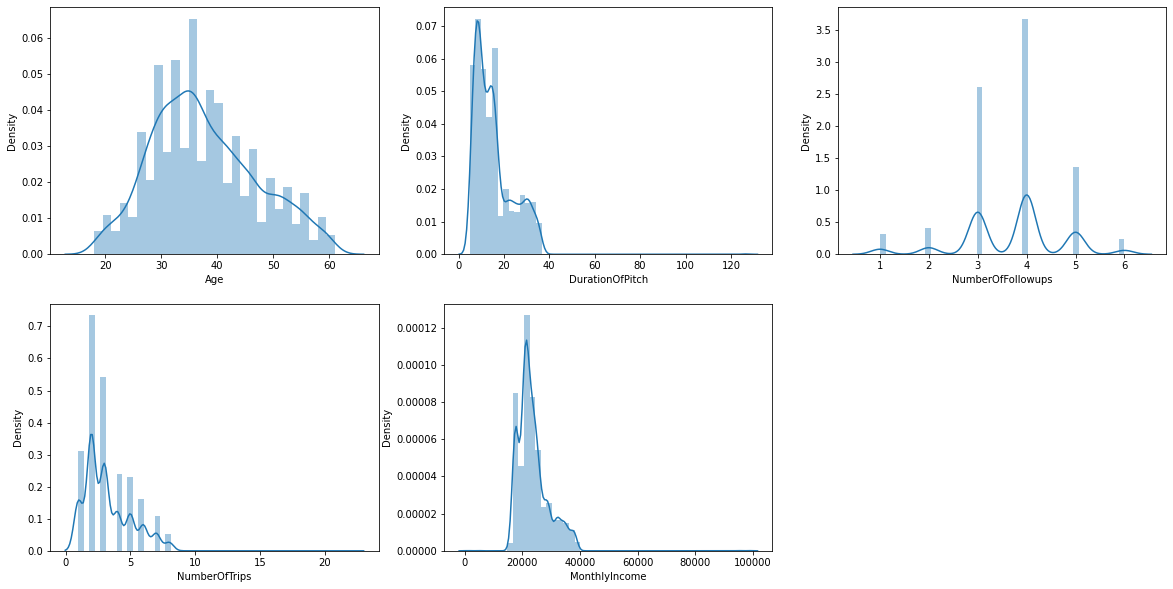

In [45]:
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(data[col])

1.   We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.
2. NumberOfTrips, DurationOfPitch, MonthlyIncome are left skew.
3. NumberOfFollowups are highly between 3-5.
4. Monthly Income are with 20000-40000

**Categorical Variables**

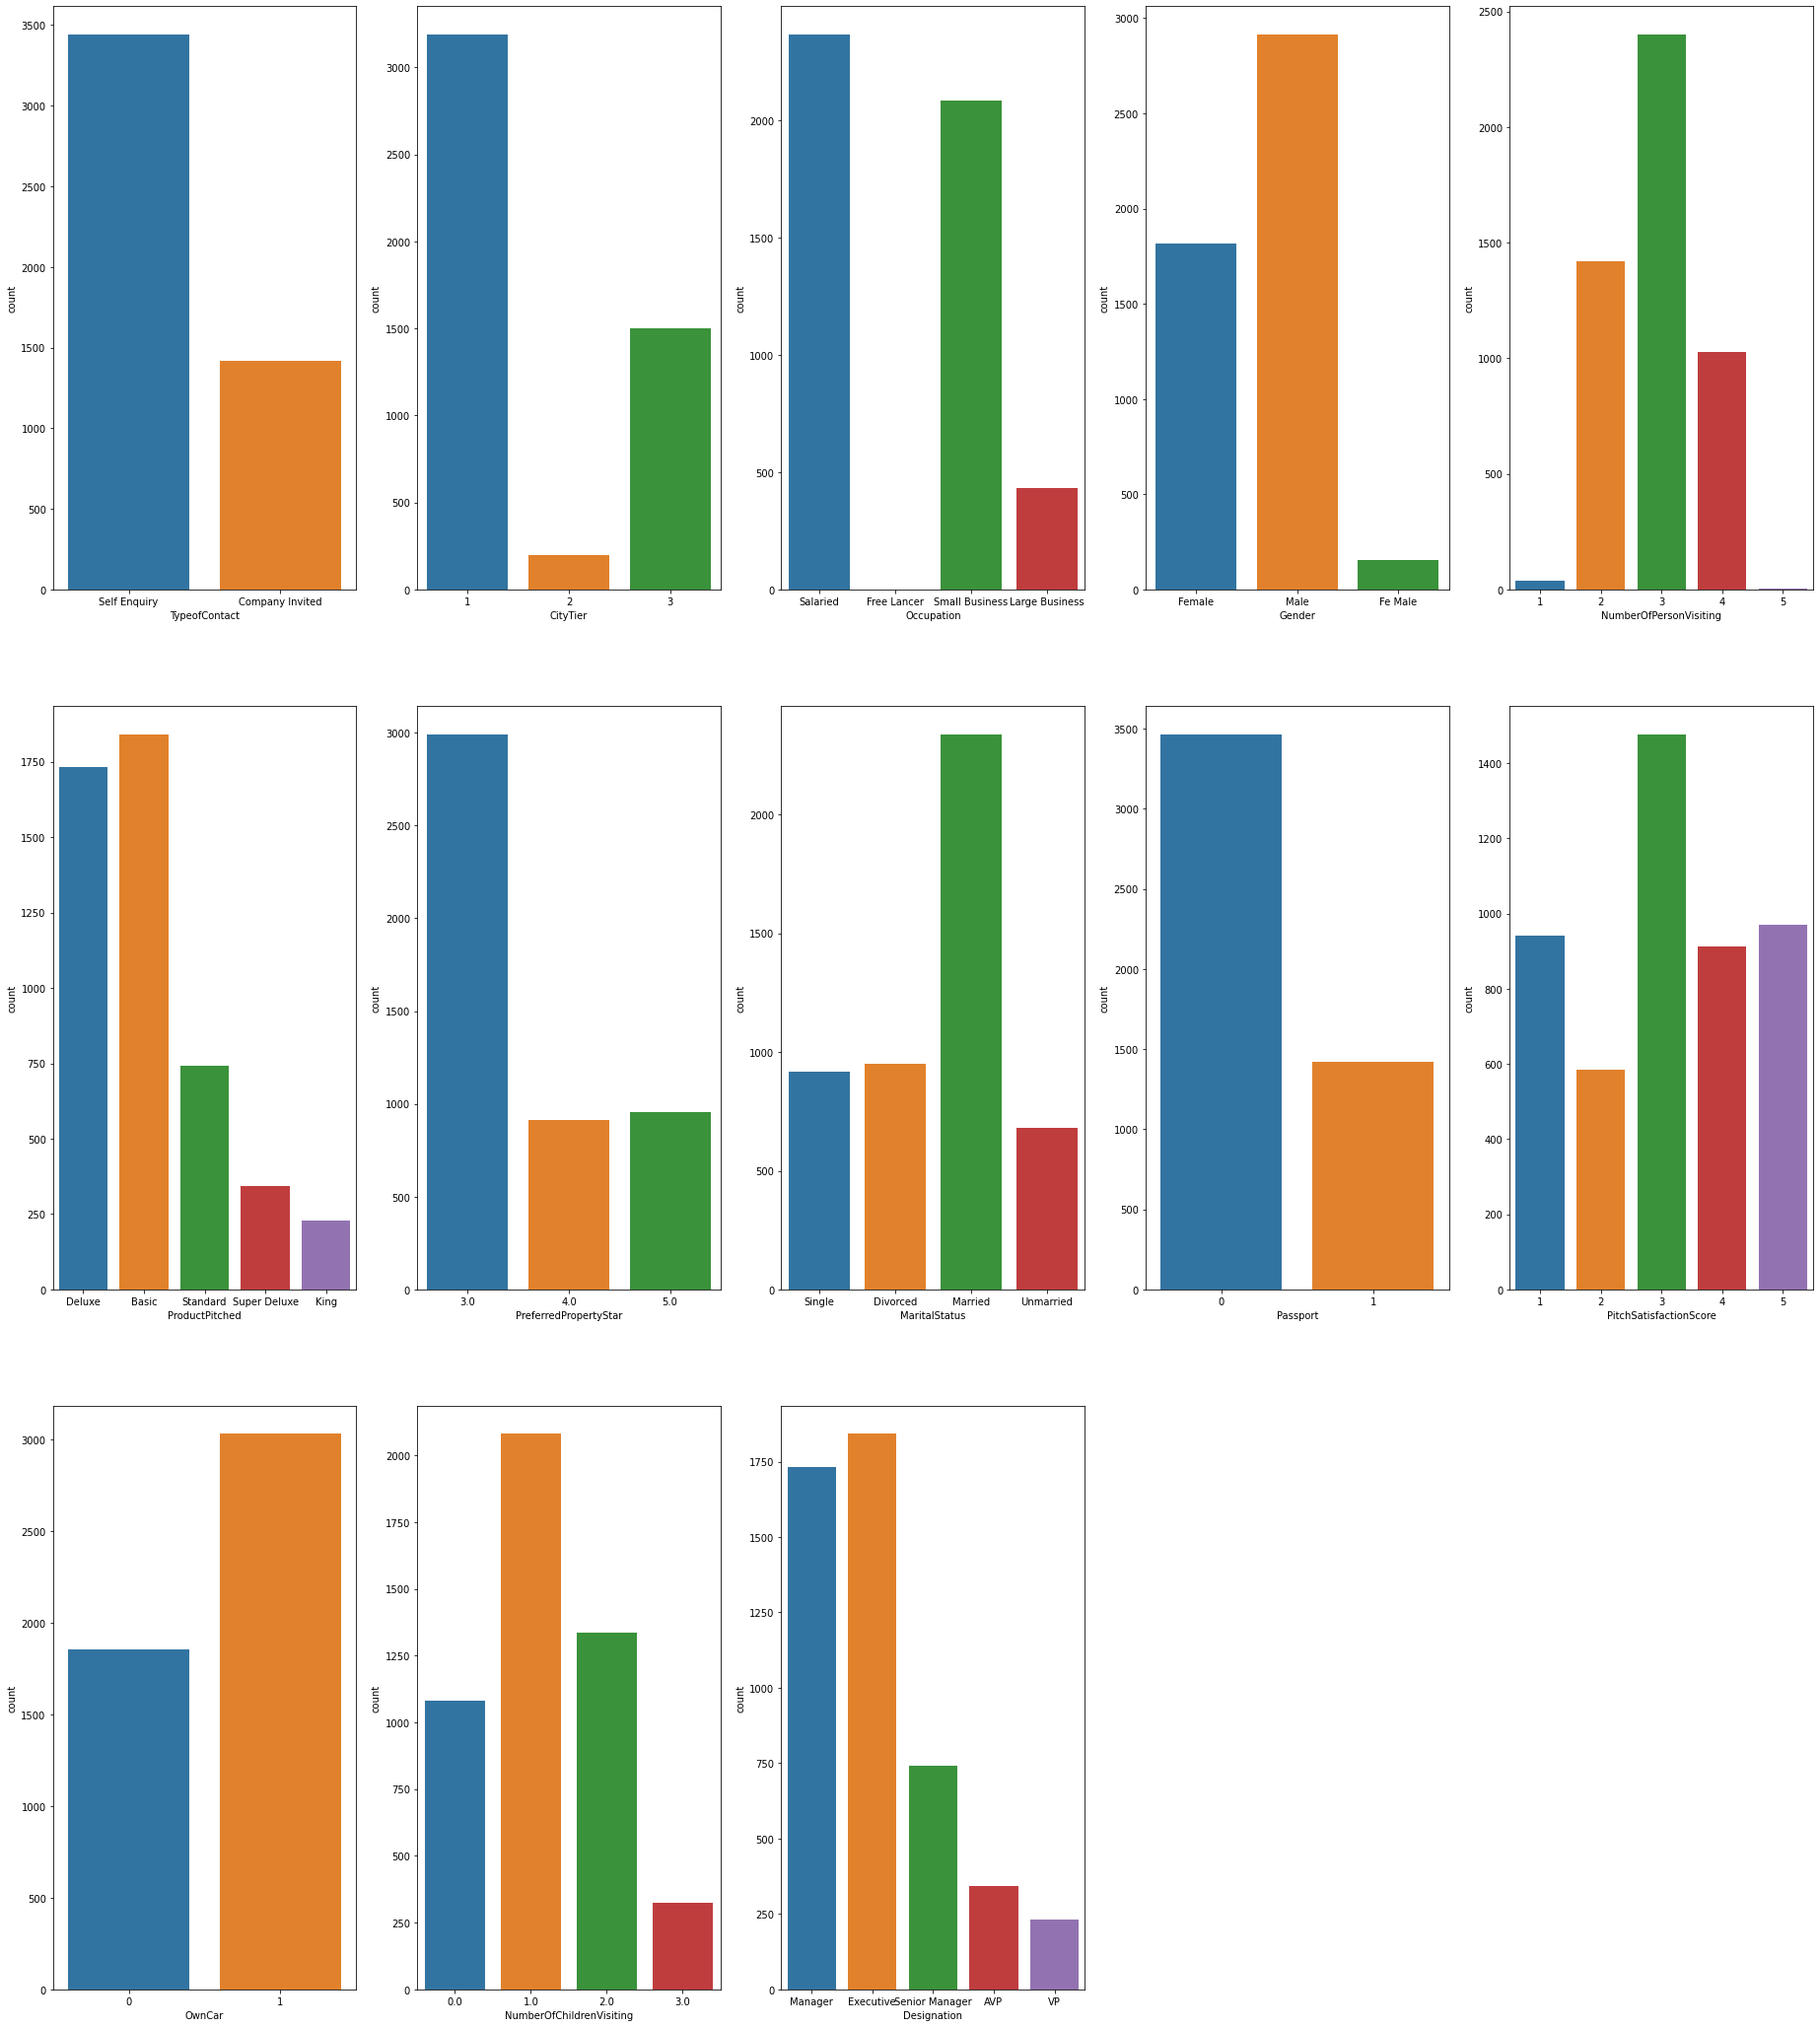

In [46]:
fig=plt.figure(figsize=(32,37))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(3,5,i+1)
    sns.countplot(data[col])

1. Mostly of the contracts are self-enquiry.
2. Moslty martial status are married.
3. Number of children likely to visit are 1 or 2 only.
4. Moslty Visitors has their own cars.
5. Manager and Executive Senior get highly benifit from travel pakage.
6. Moslty people's don't have passport to travel.
7. Top reviewed product pitched are Deluxe and Basic.

# Bivariate Analysis

**Analysing each column (Independent Attribute) first in regard with ProdTaken (Dependent attribute) and then relating them with one another for finding patterns in data**

**Continious Variables**

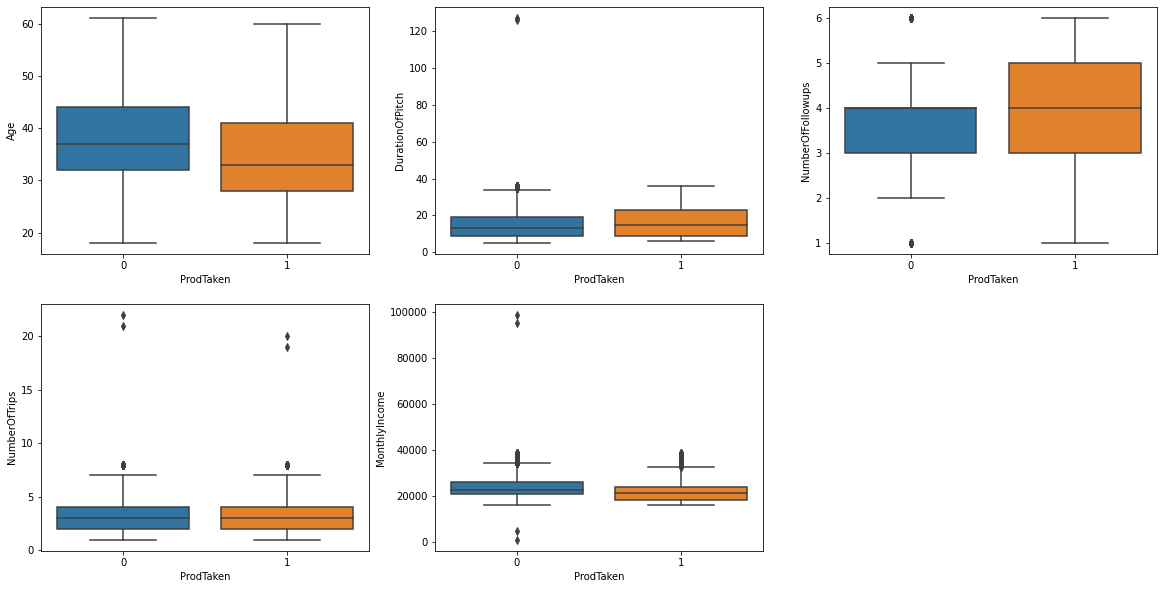

In [47]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=data[col],x=data['ProdTaken'])

* As we see there is not outlier in **Age** column.
* There are only few outliers in **DurationOfPitch**,and from the boxplot we can see that the third quartile (Q3) is equal to count 20(for not prchased travel package) and count 30 (for purchase travel package).
* No such high outliers in **NumberOfFollowups**, and from the boxplot we can see the third quartile(Q3) is equal to count 4 (for not purchased package) and count 5 (for purchased package)
* There are some outliers in **NumberOfTips** column and **MonthlyIncome** column

* It would good if we remove outliers because removing an outliers is legitimate only for specific reasons. Outliers can be very informative about the subject-area and data collection process.Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

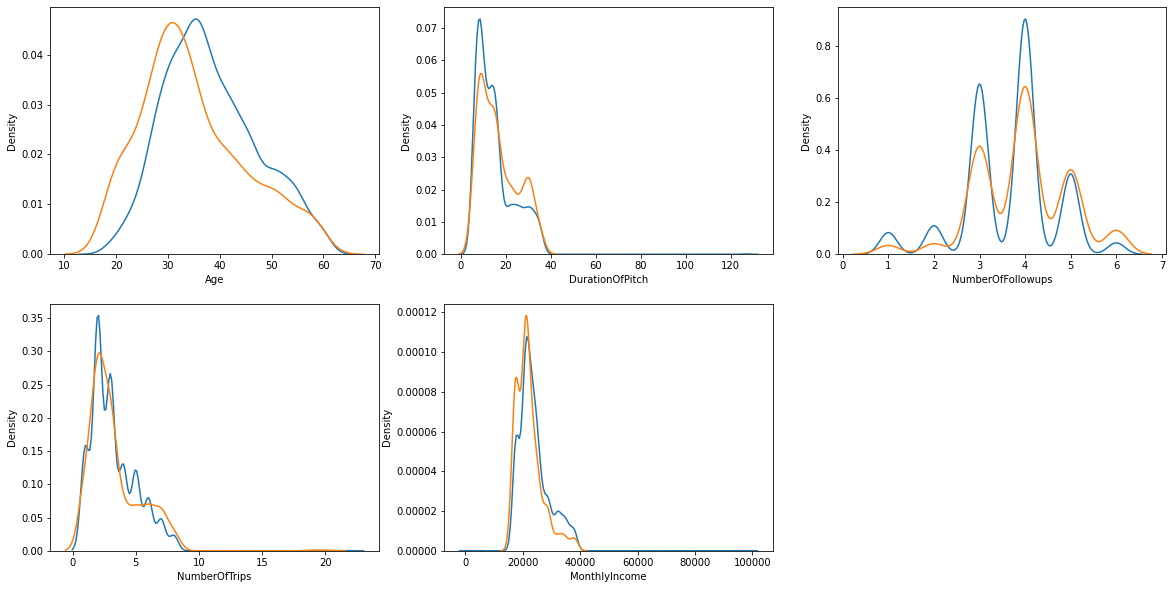

In [48]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(data[col][data['ProdTaken']==0],hist=False,label='Travel Package')
    sns.distplot(data[col][data['ProdTaken']==1],hist=False,ax=ax1,label='Travel Package')

**Categorical Variable**



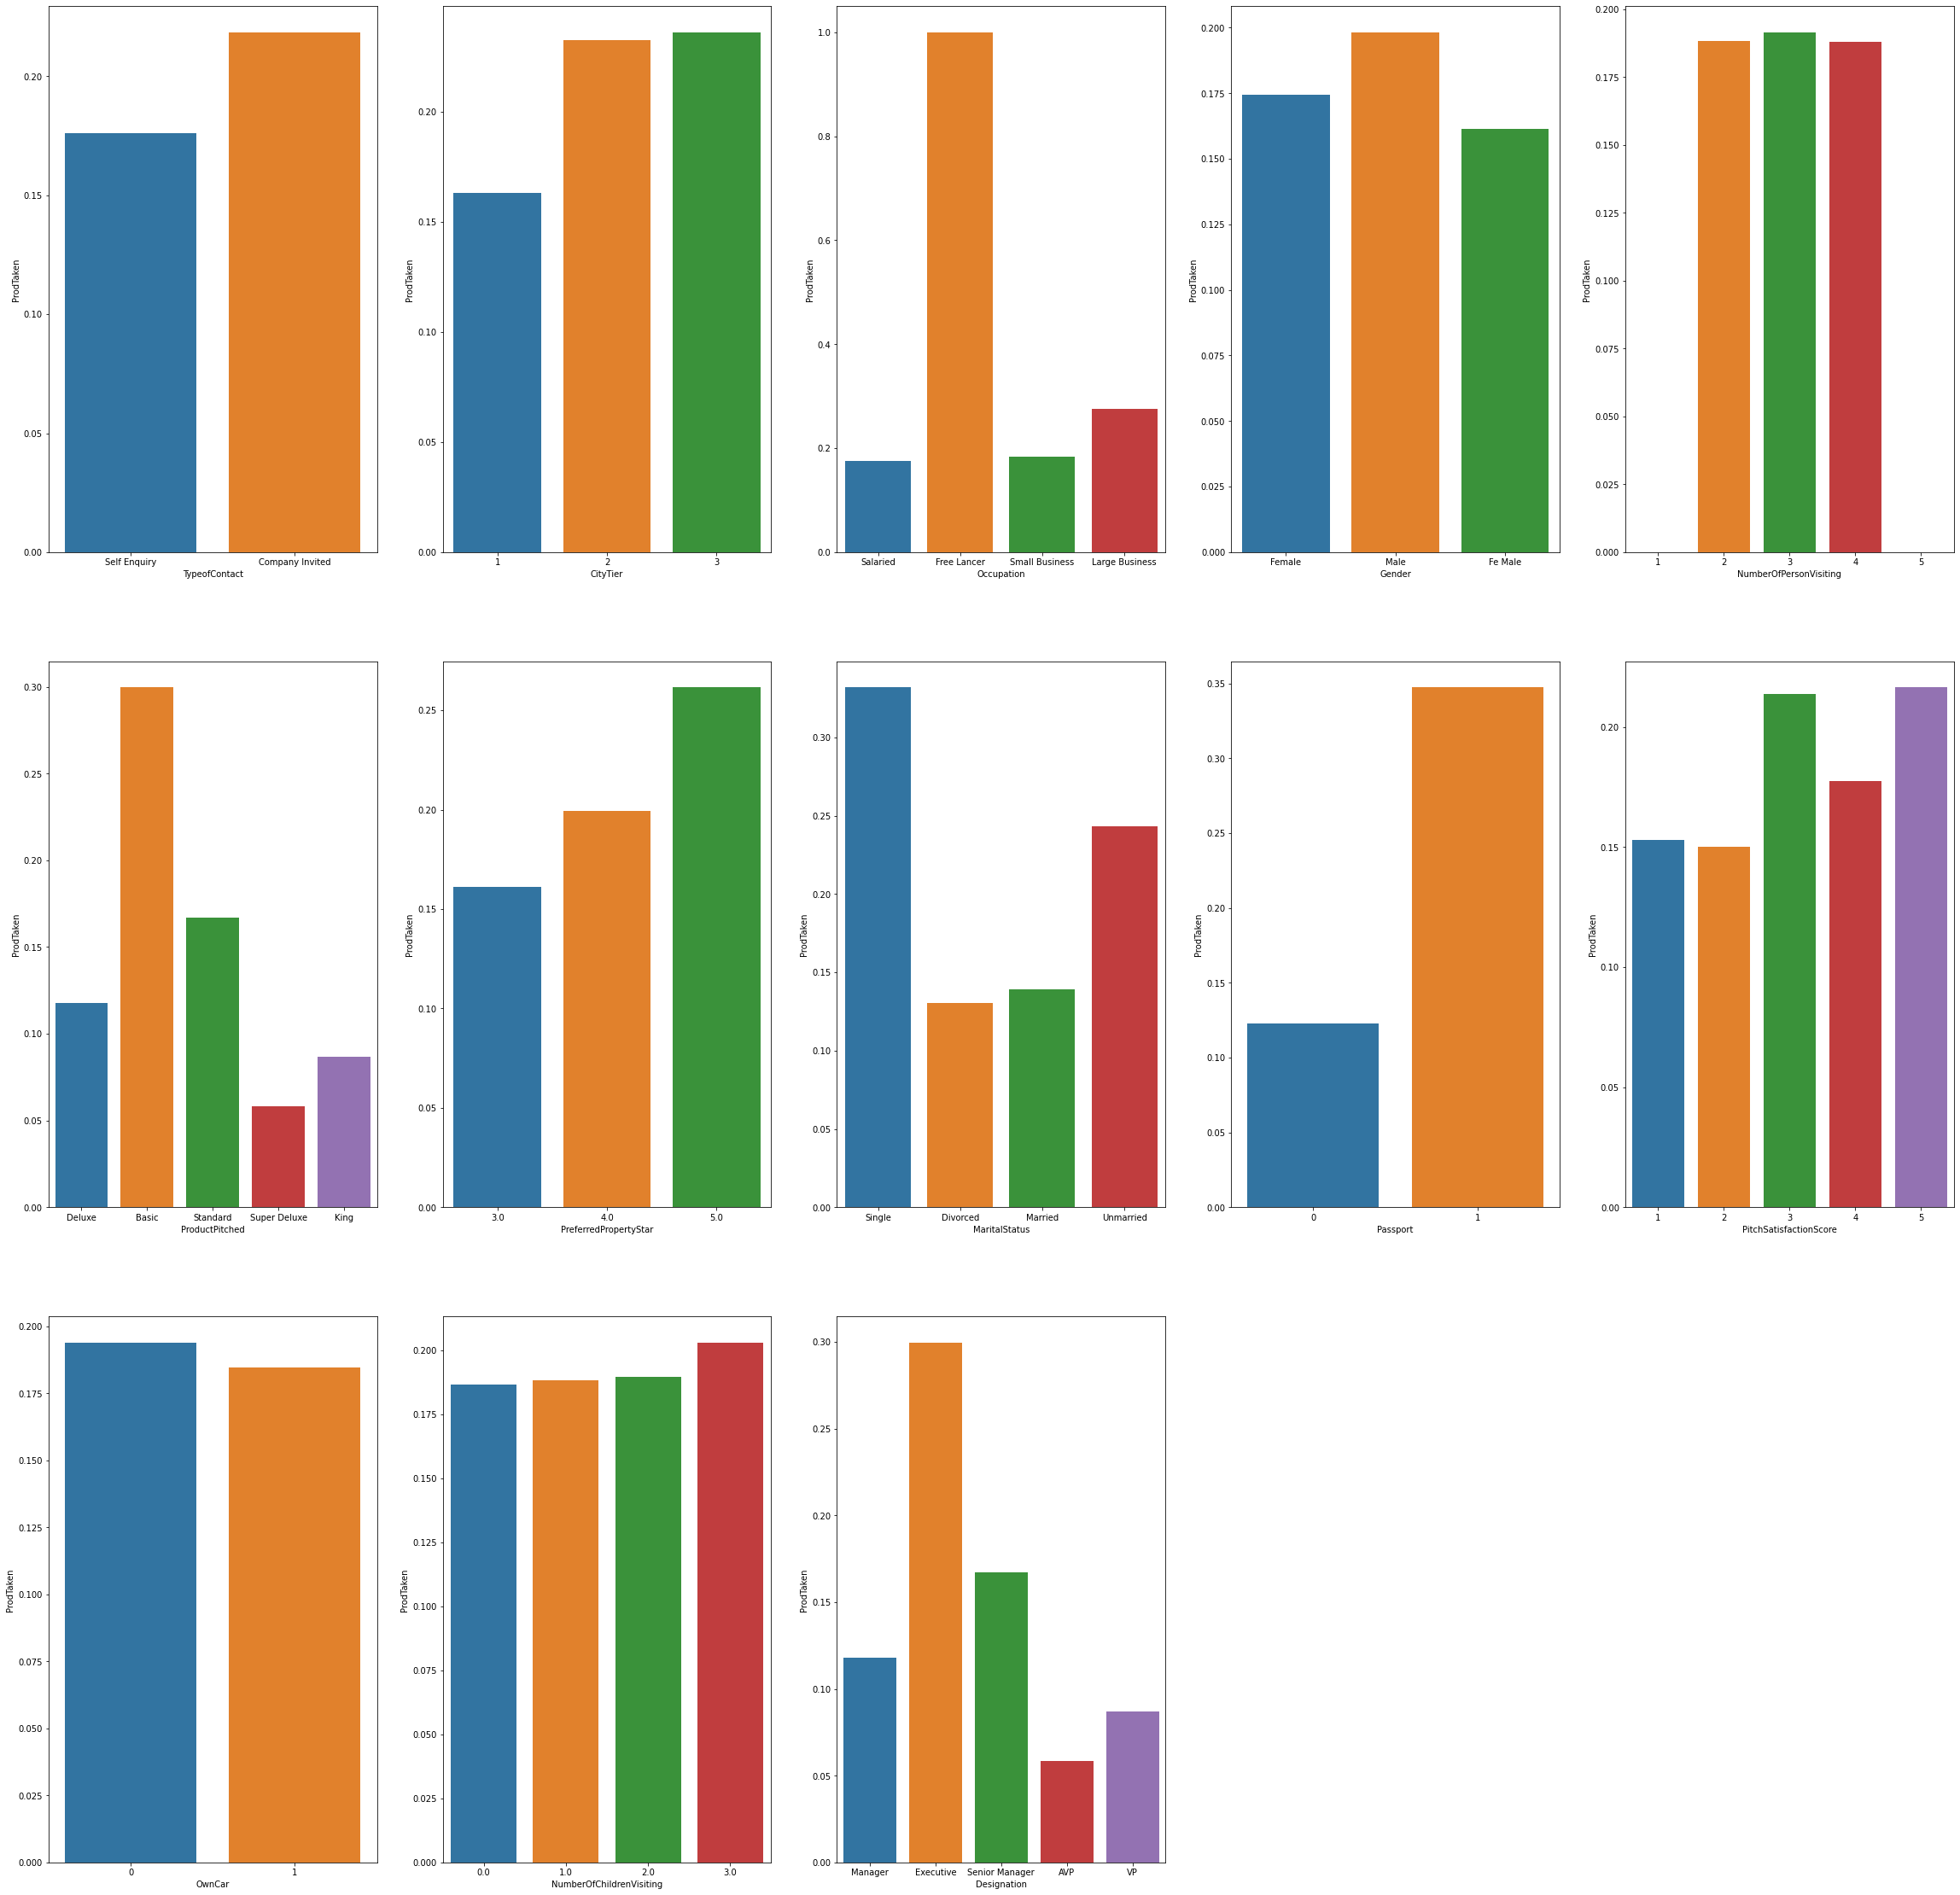

In [49]:
fig=plt.figure(figsize=(40,40))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(3,5,i+1)
    sns.barplot(x=col,y='ProdTaken',data=data,ci=None)

1. Customers who don't have car likely to purchase travel package
2. Customers who have Basic product pitch are higlhy chance to purchase a travel package. 

3. Customers with Executiv and Senior Manager are going to purchase travel package and Manager as well.
4. People having occupation as a freelancer and most of them are single in martial status are gonna purchase travel package

Monthly Income is a strong attribute which effect the chances of having travel package ,High the monthly income High the chances of having travel package. So we will analysise monthly income with other attributes

In [50]:
con=continuous_variables.copy()
con.remove('MonthlyIncome')

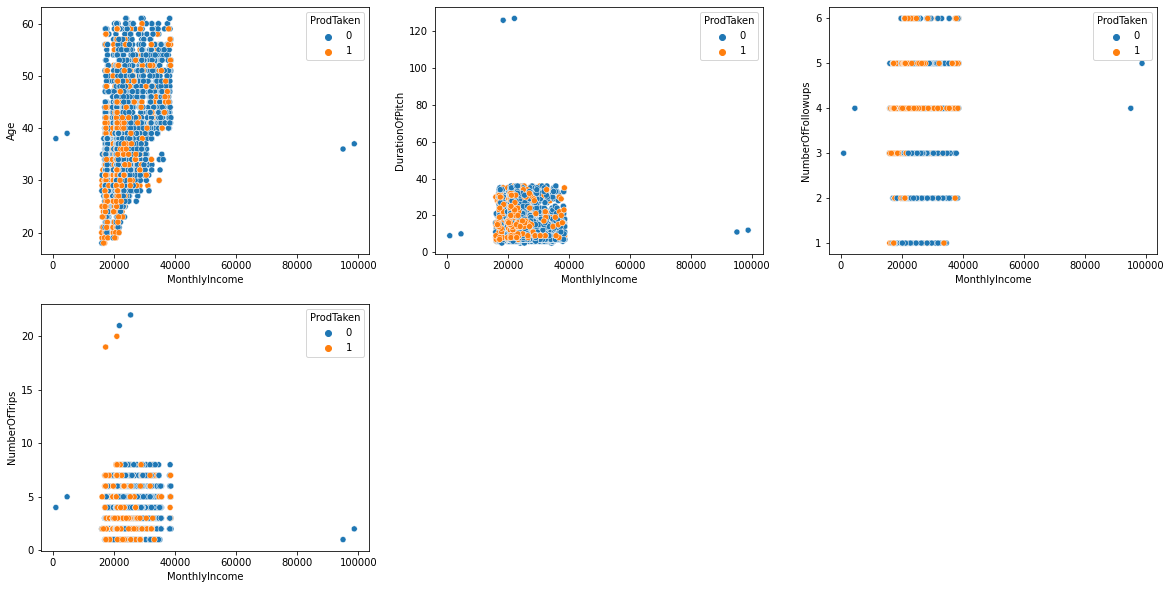

In [51]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('MonthlyIncome',col,hue='ProdTaken',data=data)

1. As we can see, the monthly income between 20000-3000 will affect the age feature.
2. Duration of Pitch are highly depend on monthly income.

In [52]:
categorical = data.select_dtypes(include=np.object).columns.tolist()

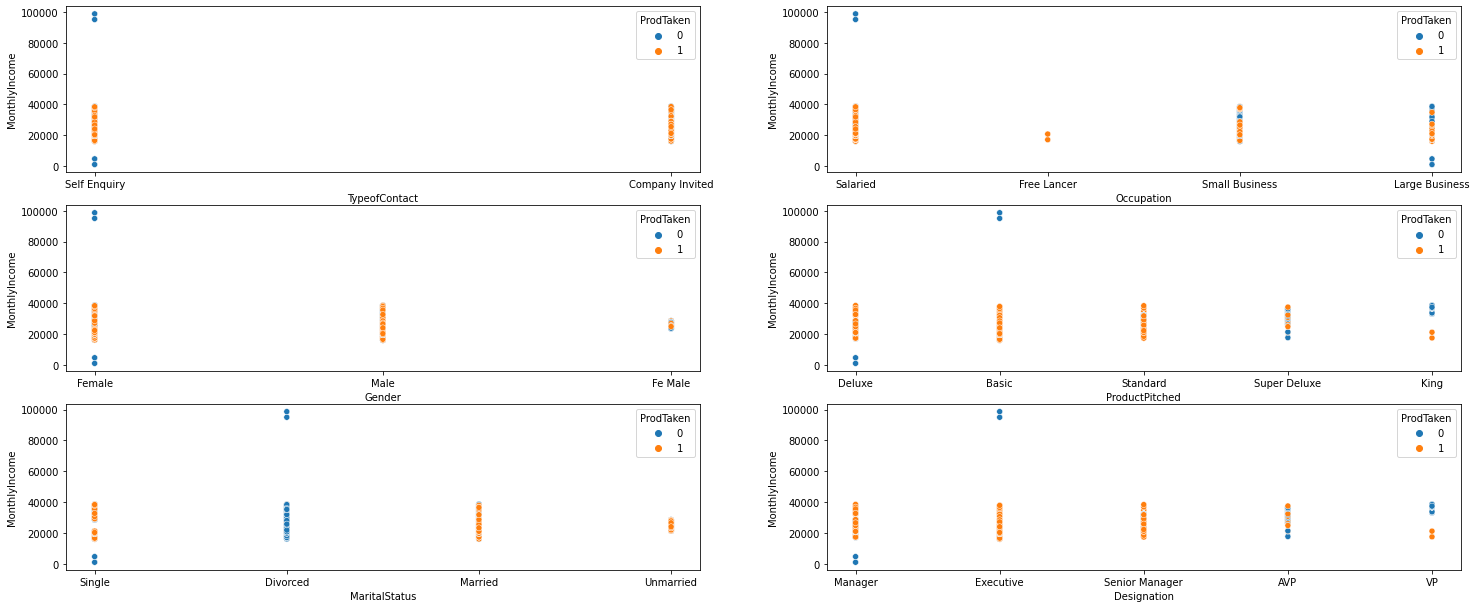

In [53]:
fig=plt.figure(figsize=(25,25))
for i,col in enumerate(categorical):
    ax=fig.add_subplot(7,2,i+1)
    sns.scatterplot(col,'MonthlyIncome',hue='ProdTaken',data=data)

1. Customers with number of visiting 1 are not likely to purchase travel package.
2. Customers with Designation VP are not much interesed to purchase travel package.
3. Customers with good monthly income and self-enquiry are likely to purchase it.
4. Customers who have pitch satisfaction score is 2 are not interested to purchased package except few of them

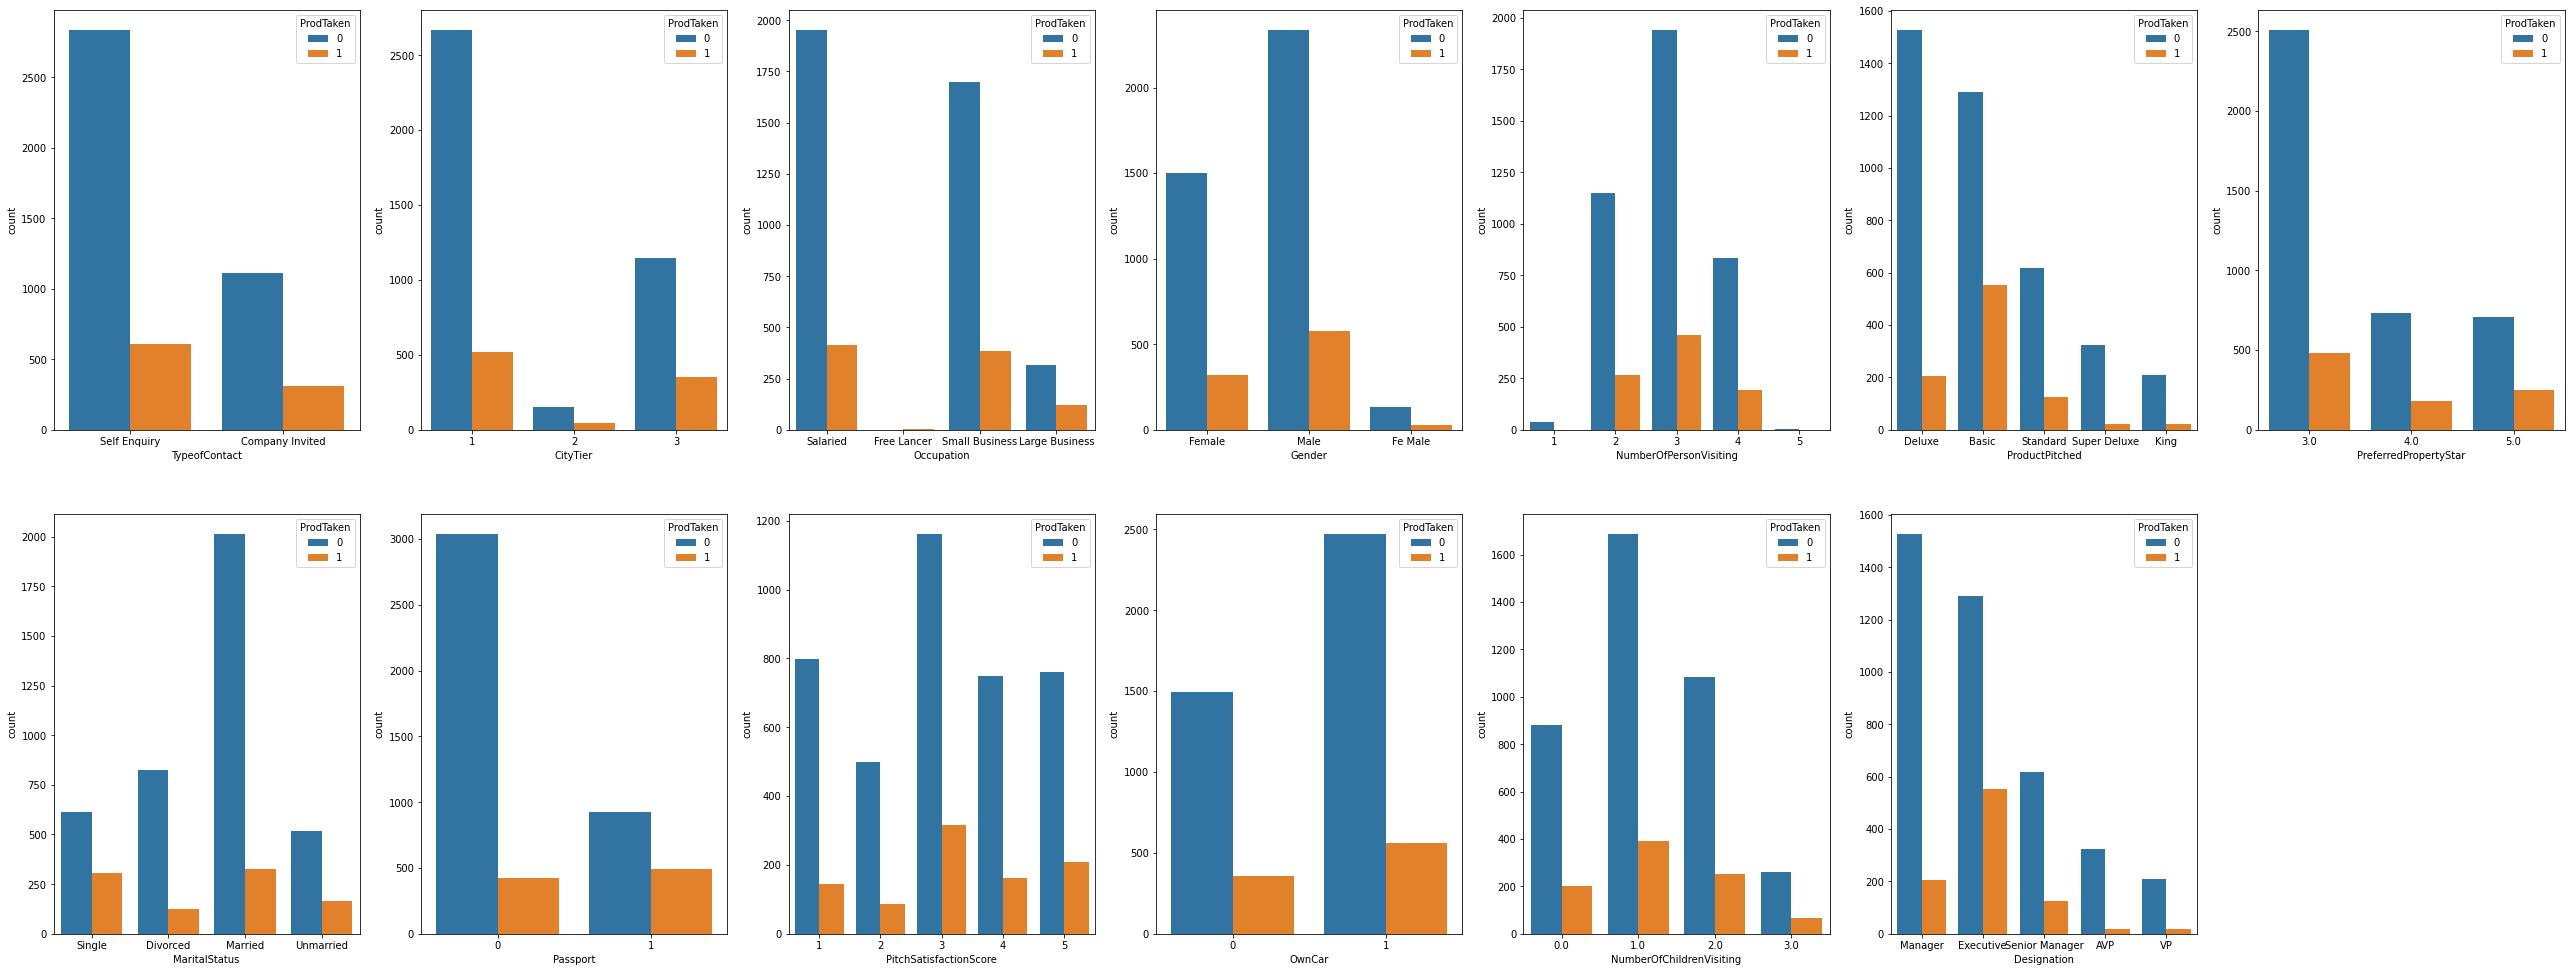

In [54]:
fig=plt.figure(figsize=(45,17))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,7,i+1)
    sns.countplot(x=col,hue='ProdTaken',data=data)

## **Feature Engineering**

**Data Cleaning**

In [55]:
data.drop_duplicates(inplace=True)

In [56]:
data.shape

(4888, 20)

**Treating Outliers**

In [58]:

for x in continuous_variables:
  Q1 = np.percentile(data[x], 25, 
                   interpolation = 'midpoint') 
  Q3 = np.percentile(data[x], 75,
                   interpolation = 'midpoint') 
  IQR = Q3 - Q1 
  
  print("Old Shape: ", data[x].shape) 
  
  # Upper bound 
  upper = np.where(data[x] >= (Q3+1.5*IQR))
  # Lower bound
  lower = np.where(data[x] <= (Q1-1.5*IQR))
  data.drop(upper[0], inplace = True)
  data.drop(lower[0], inplace = True)
  
  print("New Shape: ", data.shape) 

Old Shape:  (4888,)
New Shape:  (4888, 20)
Old Shape:  (4888,)
New Shape:  (4888, 20)
Old Shape:  (4888,)
New Shape:  (4888, 20)
Old Shape:  (4888,)
New Shape:  (4888, 20)
Old Shape:  (4888,)
New Shape:  (4888, 20)


In [59]:

continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)

['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']


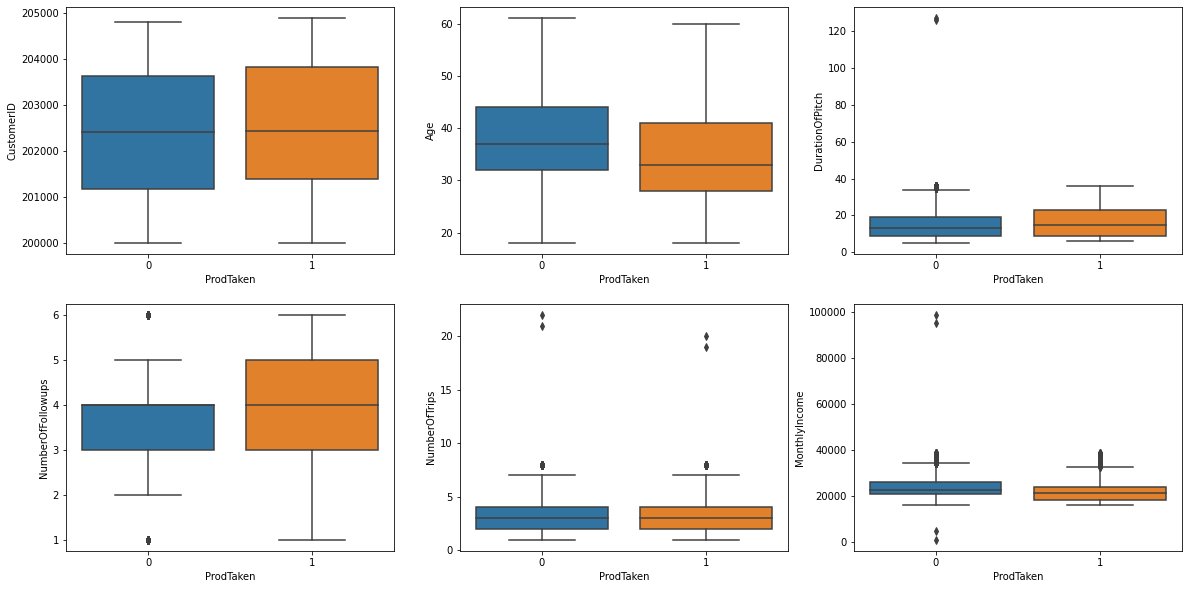

In [60]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=data[col],x=data['ProdTaken'])

Since there are no duplicate enteries or row in data so we can set CustomerID as index of dataframe

In [28]:
data.set_index("CustomerID",inplace=True)

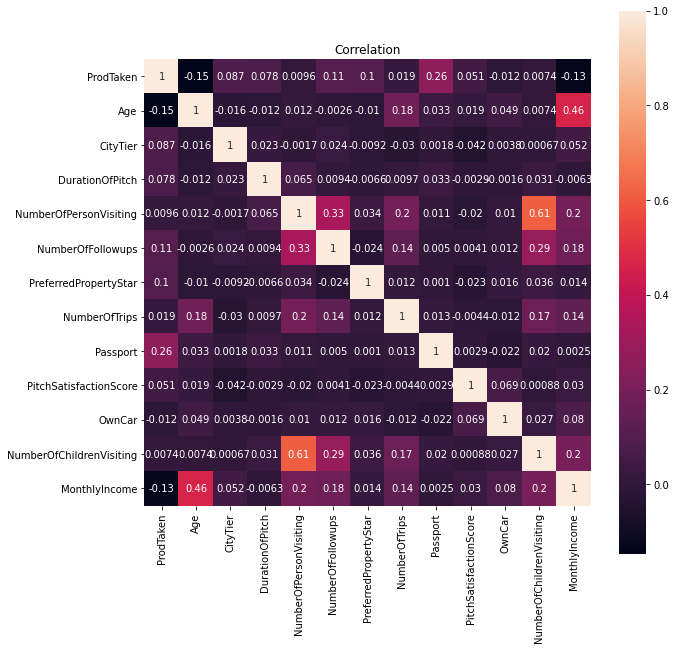

In [29]:
corr=data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr, annot=True, square=True)

In [30]:
data[['Age','DurationOfPitch','ProdTaken']].corr()

,Age,DurationOfPitch,ProdTaken
Age,1.000000,-0.012063,-0.147254
DurationOfPitch,-0.012063,1.000000,0.078257
ProdTaken,-0.147254,0.078257,1.000000


since Age shows a little better correlation with ProdTaken we will drop the DurationOfPitch attribute

In [31]:
data.drop('DurationOfPitch',axis=1,inplace=True)

**Creating Attributes**

We will try to create a new feature Account contain 1 if any customer is having either NumberOfTrips or NumberOfChildrenVisiting or zero if customer have none of them and will try to find its relation with target variable if it shows a better relation compaired to other two then we will keep it otherwise we will remove it

In [ ]:
data['Account']=data['NumberOfTrips']+data['NumberOfChildrenVisiting']

In [ ]:
data[['NumberOfTrips','NumberOfChildrenVisiting','Account','ProdTaken']].corr()

,NumberOfTrips,NumberOfChildrenVisiting,Account,ProdTaken
NumberOfTrips,1.000000,0.168795,0.920990,0.018898
NumberOfChildrenVisiting,0.168795,1.000000,0.539455,0.007421
Account,0.920990,0.539455,1.000000,0.021814
ProdTaken,0.018898,0.007421,0.021814,1.000000


Since NumberOf Children and Trips shows weak relation than Account, we will extract both features

In [ ]:
data.drop(['NumberOfTrips','NumberOfChildrenVisiting'],axis=1,inplace=True)

we will now try to create a attribute facilities which will contain 1 if customer uses the facilities like propertystar or person visiting else it will contain 0 and then we will check for relation with the target variable if it is better then the previous one we will keep that attribute

In [ ]:
data['Facilities']=data['NumberOfPersonVisiting']+data['PreferredPropertyStar']

In [ ]:
data[['PreferredPropertyStar','NumberOfPersonVisiting','Facilities','ProdTaken']].corr()

,PreferredPropertyStar,NumberOfPersonVisiting,Facilities,ProdTaken
PreferredPropertyStar,1.000000,0.033867,0.750686,0.099577
NumberOfPersonVisiting,0.033867,1.000000,0.685703,0.009627
Facilities,0.750686,0.685703,1.000000,0.078129
ProdTaken,0.099577,0.009627,0.078129,1.000000


We will keep the Facilities attribute and drop the Property Star and Person visiting attributes

In [ ]:
data.drop(['PreferredPropertyStar','NumberOfPersonVisiting'],axis=1,inplace=True)

In [ ]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfFollowups,ProductPitched,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Account,Facilities
CustomerID,,,,,,,,,,,,,,,,
200000,1,41.0,Self Enquiry,3,Salaried,Female,3.0,Deluxe,Single,1,2,1,Manager,20993.0,1.0,6.0
200001,0,49.0,Company Invited,1,Salaried,Male,4.0,Deluxe,Divorced,0,3,1,Manager,20130.0,4.0,7.0
200002,1,37.0,Self Enquiry,1,Free Lancer,Male,4.0,Basic,Single,1,3,0,Executive,17090.0,7.0,6.0
200003,0,33.0,Company Invited,1,Salaried,Female,3.0,Basic,Divorced,1,5,1,Executive,17909.0,3.0,5.0
200004,0,NaN,Self Enquiry,1,Small Business,Male,3.0,Basic,Divorced,0,5,1,Executive,18468.0,1.0,6.0


**Dropping Null Values**

In [ ]:
data.shape

(4888, 16)

In [ ]:
data = data.dropna()

data.shape  #size of a dataset after removing null values

(4282, 16)

**VIF Collinearity**

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the **Variance Inflation Factor(VIF)**.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity_check(X, thresh=5.0):
    data_type = X.dtypes
    # print(type(data_type))
    int_cols = \
    X.select_dtypes(include=['int', 'int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']).shape[1]
    total_cols = X.shape[1]
    try:
        if int_cols != total_cols:
            raise Exception('All the columns should be integer or float, for multicollinearity test.')
        else:
            variables = list(range(X.shape[1]))
            dropped = True
            print('''\n\nThe VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.\n\n''')
            while dropped:
                dropped = False
                vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in variables]
                print('\n\nvif is: ', vif)
                maxloc = vif.index(max(vif))
                if max(vif) > thresh:
                    print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                    # del variables[maxloc]
                    X.drop(X.columns[variables[maxloc]], 1, inplace=True)
                    variables = list(range(X.shape[1]))
                    dropped = True

            print('\n\nRemaining variables:\n')
            print(X.columns[variables])
            # return X.iloc[:,variables]
            return X
    except Exception as e:
        print('Error caught: ', e)


        

In [ ]:
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=[np.object])
vif_features = data.select_dtypes(exclude=[np.object])
vif_features = multicollinearity_check(vif_features, thresh=5.0)



The VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.




vif is:  [1.4315887143274737, 19.773354686995255, 4.223140870922989, 15.364060023972524, 1.5368876394932975, 5.739566303094364, 2.611948507837397, 33.04052805721031, 6.073301692558627, 26.64260155889827]
dropping 'MonthlyIncome' at index: 7


vif is:  [1.4149805198858112, 13.909234968187507, 4.109837602138749, 14.528410076144036, 1.534875419613914, 5.6799392059074085, 2.5953481816245, 6.062700632900776, 23.681711755759768]
dropping 'Facilities' at index: 8


vif is:  [1.4089897714512674, 11.691647383461731, 3.9932057080474586, 11.291974085602268, 1.5327913613364172, 5.455416291550843, 2.56276963054941, 5.64242539459087]
dropping 'Age' at index: 1


vif is:  [1.3643317677728386, 3.7569114108887267, 9.345206955396712, 1.5028751078531142, 4.964631060479257, 2.49845

In [ ]:
data = pd.concat([categorical_features,vif_features], axis=1) #concatenating of vif features with categorical features
data

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation,ProdTaken,CityTier,Passport,PitchSatisfactionScore,OwnCar,Account
CustomerID,,,,,,,,,,,,
200000,Self Enquiry,Salaried,Female,Deluxe,Single,Manager,1,3,1,2,1,1.0
200001,Company Invited,Salaried,Male,Deluxe,Divorced,Manager,0,1,0,3,1,4.0
200002,Self Enquiry,Free Lancer,Male,Basic,Single,Executive,1,1,1,3,0,7.0
200003,Company Invited,Salaried,Female,Basic,Divorced,Executive,0,1,1,5,1,3.0
200005,Company Invited,Salaried,Male,Basic,Single,Executive,0,1,0,5,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
204883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager,1,3,1,1,1,3.0
204884,Company Invited,Salaried,Male,Basic,Single,Executive,1,1,1,3,1,5.0
204885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager,1,3,0,1,1,10.0


**Label Encoding**

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [ ]:
from sklearn.preprocessing import LabelEncoder
column = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
le = LabelEncoder()
for col in column:
    data[col] = le.fit_transform(data[col])

In [ ]:
data

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation,ProdTaken,CityTier,Passport,PitchSatisfactionScore,OwnCar,Account
CustomerID,,,,,,,,,,,,
200000,1,2,1,1,2,2,1,3,1,2,1,1.0
200001,0,2,2,1,0,2,0,1,0,3,1,4.0
200002,1,0,2,0,2,1,1,1,1,3,0,7.0
200003,0,2,1,0,0,1,0,1,1,5,1,3.0
200005,0,2,2,0,2,1,0,1,0,5,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
204883,1,3,2,1,3,2,1,3,1,1,1,3.0
204884,0,2,2,0,2,1,1,1,1,3,1,5.0
204885,1,2,1,3,1,3,1,3,0,1,1,10.0


**Applying Scaling**



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled_df=scaler.fit_transform(data.drop('ProdTaken',axis=1))

In [ ]:
scaled_df=pd.DataFrame(scaled_df)

In [ ]:
scaled_df.columns=data.drop('ProdTaken',axis=1).columns
scaled_df.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation,CityTier,Passport,PitchSatisfactionScore,OwnCar,Account
0,0.646800,-0.516346,-0.988658,-0.124395,0.735797,0.313991,1.437517,1.544338,-0.780556,0.790599,-1.608018
1,-1.546073,-0.516346,0.781912,-0.124395,-1.360465,0.313991,-0.726846,-0.647527,-0.046460,0.790599,-0.221576
2,0.646800,-3.648065,0.781912,-0.914693,0.735797,-0.797174,-0.726846,1.544338,-0.046460,-1.264863,1.164866
3,-1.546073,-0.516346,-0.988658,-0.914693,-1.360465,-0.797174,-0.726846,1.544338,1.421733,0.790599,-0.683723
4,-1.546073,-0.516346,0.781912,-0.914693,0.735797,-0.797174,-0.726846,-0.647527,1.421733,0.790599,-1.145870


## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune the models, if required.
5. Test the data on test set.

In [ ]:
column_names = list(data.columns)
column_names.remove('ProdTaken')  # removing Prod feature
feature_names = column_names
print(feature_names)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'CityTier', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Account']


In [ ]:
# splitting a dataset into X and Y
X=scaled_df
y=data['ProdTaken']

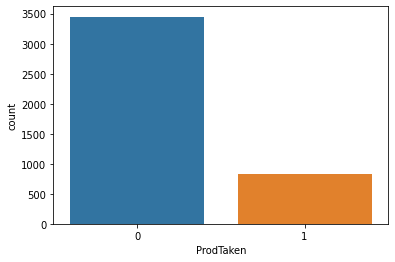

In [ ]:
g = sns.countplot(data['ProdTaken'])   # checking class inbalancing in a datase
plt.show()

* As we can see data is in imbalancing pattern

**Sampling Methods**

Random oversampling can be implemented using the RandomOverSampler class. ... This means that if the majority class had 1,000 examples and the minority class had 100, this strategy would oversampling the minority class so that it has 1000 examples.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sm = RandomOverSampler(sampling_strategy='minority')       # applying sampler method to a dataset, to balance it.
X, y = sm.fit_sample(X, y.ravel())
  

## Split Data

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4828, 11) (2070, 11)


# **Model evaluation criterion**


**Model evaluation criterion**

1. Predicting a person doesn't purchase package and the person has purchase.
2. Predicting a person purchase package, and the person doesn't purchase a package.

**Which case is more important?**

* Predicting a person doesn't purchase package, and the person has purchased a package.

**Which metric to optimize?**



*   We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of purchasing of package and in reality, that person doesn't purchase package then that person can go through further levels of testing to confirm whether the person is actually at risk of purchasing package but if we predict that a person is not at risk of purchase package but the person is at risk of package then that person will go purchase and this would lead to further problems.



**Let's define function to provide recall scores on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating model**

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
### Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Decision Tree**

Accuracy on training set :  0.9828086164043082
Accuracy on test set :  0.9231884057971015
Recall on training set :  0.9908180300500835
Recall on test set :  0.9610636277302944
Precision on training set :  0.9749486652977413
Precision on test set :  0.8955752212389381
F1-Score on training set :  0.9828192920720349
F1-Score on test set :  0.9271644525881814


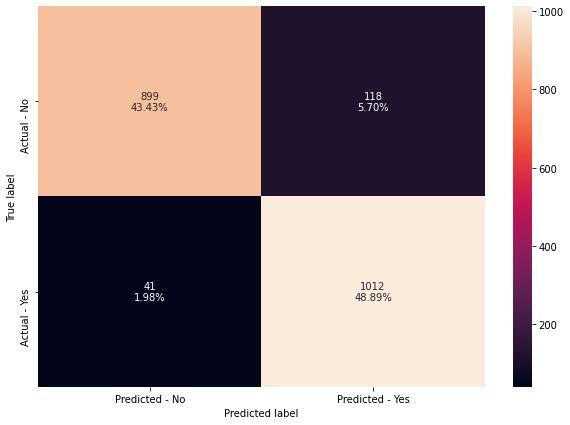

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* Accuracy on testing data is 0.91.
* Recall on testing data is 0.97.
* Precision on testing data is 0.89.
* F1 score on testing data is 0.92.


**Hyperparameter Tuning**

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.18, 1: 0.72},
                       criterion='gini', max_depth=6, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

Accuracy on training set :  0.6172328086164043
Accuracy on test set :  0.6270531400966184
Recall on training set :  0.9837228714524207
Recall on test set :  0.9867046533713201
Precision on training set :  0.5657705232837253
Precision on test set :  0.5781858653311074
F1-Score on training set :  0.7183785431270954
F1-Score on test set :  0.729122807017544


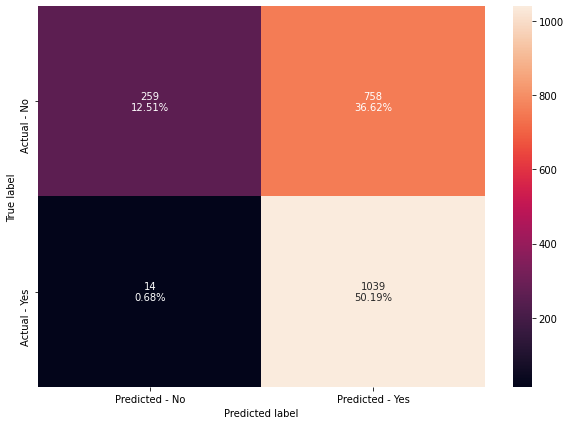

In [ ]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

* By applying hyper-parameter tuning , we got lower accuracy around 0.66.
* There are highly misclassified FP around 36.62%.
* F1 score is very low that is 0.72.

## **Random Forest**

Accuracy on training set :  0.9828086164043082
Accuracy on test set :  0.9420289855072463
Recall on training set :  0.9962437395659433
Recall on test set :  0.9838556505223172
Precision on training set :  0.9699309223892727
Precision on test set :  0.9095697980684812
F1-Score on training set :  0.982911262095944
F1-Score on test set :  0.9452554744525548


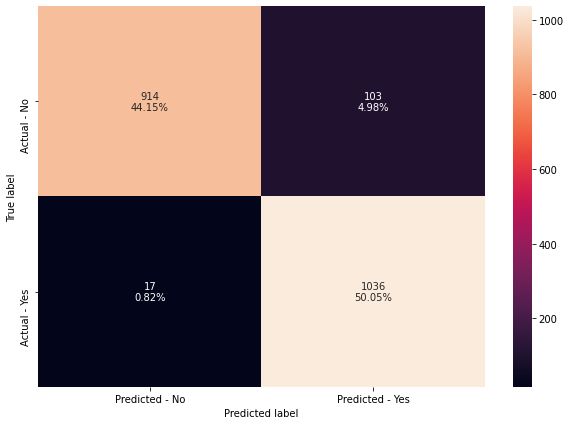

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Model predicted results perfectly with accuracy of 0.94 on testing data and recall 0.98
* Misclassified results are too less.
* F1 score on test data is 0.94

**Tuning Random Forest**

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.18, 1: 0.82}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=12, n_jobs=None, oob_score=True,
                       random_state=1, verbose=0, warm_start=False)

Accuracy on training set :  0.9809444904722452
Accuracy on test set :  0.9449275362318841
Recall on training set :  0.9995826377295493
Recall on test set :  0.9905033238366572
Precision on training set :  0.9633950120675785
Precision on test set :  0.909328683522232
F1-Score on training set :  0.9811552642359689
F1-Score on test set :  0.9481818181818182


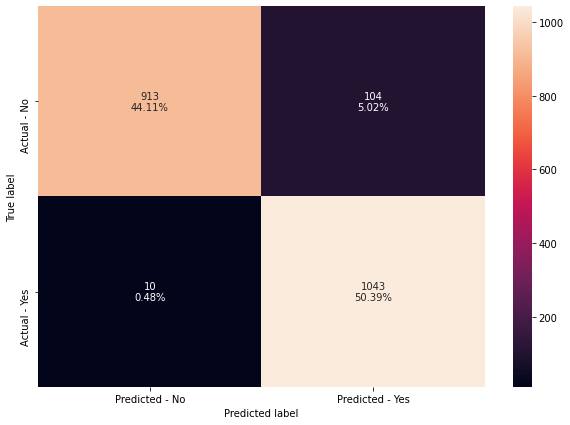

In [ ]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

* By Applying hyper-parameter we got good results, however they are less accuracte than random forest with default paramters
* FP is 106 and FN 13.

## **Bagging Classifier**

Accuracy on training set :  0.9807373653686827
Accuracy on test set :  0.9289855072463769
Recall on training set :  0.994991652754591
Recall on test set :  0.97340930674264
Precision on training set :  0.9671399594320487
Precision on test set :  0.8959790209790209
F1-Score on training set :  0.98086813412878
F1-Score on test set :  0.9330905780609923


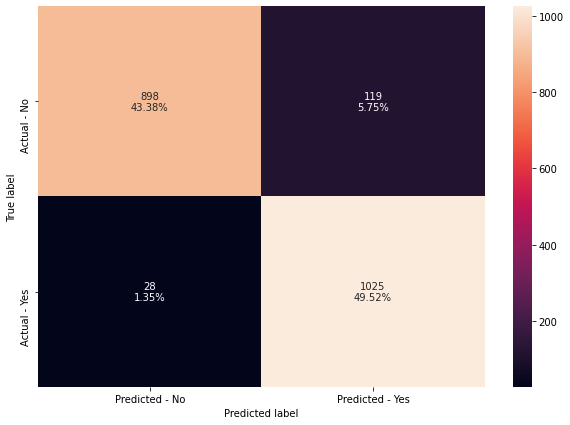

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* Accuracy of model is 0.93 on testing data.
* Recall on testing data is 0.97.
* Precsion on testing data is 0.89.
* F1 score on testing data is 0.93

**Tuning Bagging Classifier**

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

Accuracy on training set :  0.977837613918807
Accuracy on test set :  0.9318840579710145
Recall on training set :  0.9924874791318865
Recall on test set :  0.97340930674264
Precision on training set :  0.9639237940818808
Precision on test set :  0.9007029876977153
F1-Score on training set :  0.977997121118651
F1-Score on test set :  0.9356458238247374


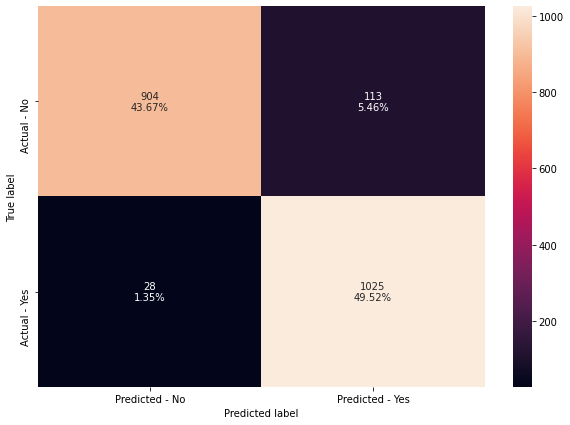

In [ ]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

* By tuning Bagging Classifier we got good results, however it is less accurate than bagging with default parameters.
* Precision on testing data is 0.90
* Recall on testing data is 0.97
* F1 score on testing data is 0.93.


## **Model performance improvement - Bagging**

In Bagging models, the bagging giving the highest performance in terms of f1 score recall & precision, in the second highest random forest classifier as well,however decision tree was not predicting good results by applying hyper-parameters. 

F1 score,it takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution, so the f1 score and recall would be good to evaluate a model performance

**AdaBoost Classifier**

Accuracy on training set :  0.7195526097763049
Accuracy on test set :  0.6951690821256039
Recall on training set :  0.7174457429048414
Recall on test set :  0.6856600189933523
Precision on training set :  0.7174457429048414
Precision on test set :  0.7064579256360078
F1-Score on training set :  0.7174457429048413
F1-Score on test set :  0.6959036144578313


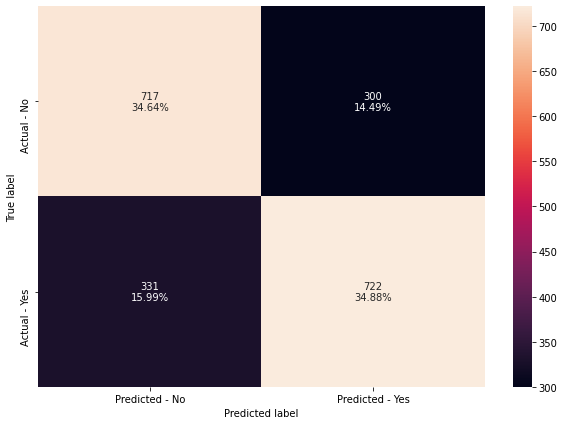

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

* AdaBoost Classifier predicting bad results with less accuracy and recall score.
* Highly misclassified results of FP and FN.

**Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Accuracy on training set :  0.8775890637945319
Accuracy on test set :  0.8314009661835748
Recall on training set :  0.8856427378964942
Recall on test set :  0.8385565052231719
Precision on training set :  0.8700287002870029
Precision on test set :  0.8314500941619586
F1-Score on training set :  0.8777662874870734
F1-Score on test set :  0.8349881796690308


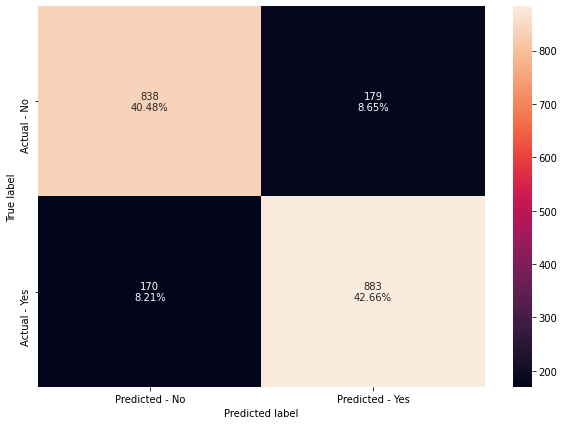

In [ ]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

* By applying AdaBoost Classifier , we got better results than default adaboost classifier results.

**Gradient Boosting Classifier**

Accuracy on training set :  0.777754763877382
Accuracy on test set :  0.7541062801932367
Recall on training set :  0.7299666110183639
Recall on test set :  0.7018043684710351
Precision on training set :  0.8041379310344827
Precision on test set :  0.791220556745182
F1-Score on training set :  0.7652592430540361
F1-Score on test set :  0.7438349270256668


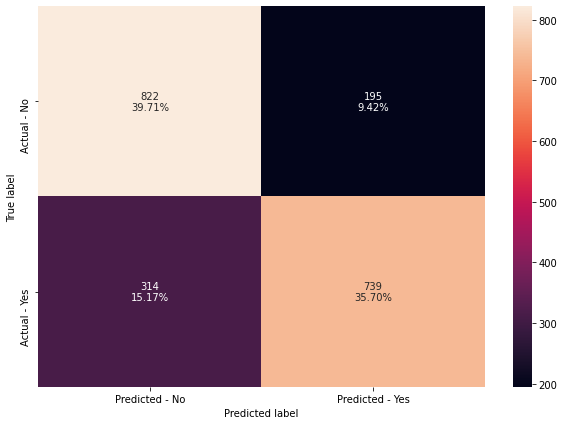

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

* Gradient Boosting Classifier has predicted bad results with low accuracy and recall score.

* Highly misclassified FN with 13.43% and FP with 8.94%.

**Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

Accuracy on training set :  0.8235294117647058
Accuracy on test set :  0.7913043478260869
Recall on training set :  0.8155258764607679
Recall on test set :  0.7834757834757835
Precision on training set :  0.8265651438240271
Precision on test set :  0.8017492711370262
F1-Score on training set :  0.8210084033613446
F1-Score on test set :  0.7925072046109509


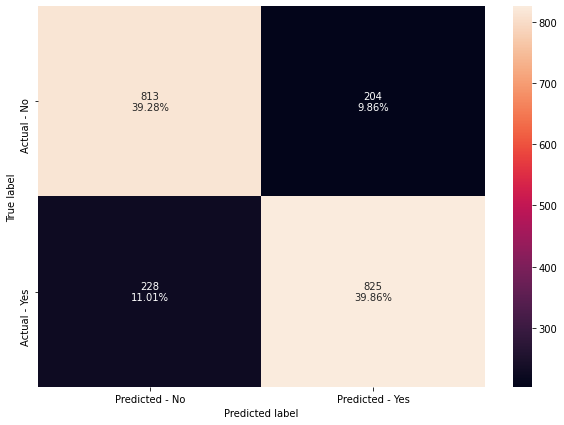

In [ ]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

* By Applying hyper-paramter tuning we got better results with good accuracy and recall score than default gradient bossting results.
* Less FN but FP went high little bid

**XGBoost Classifier**

Accuracy on training set :  0.775890637945319
Accuracy on test set :  0.7536231884057971
Recall on training set :  0.7282971619365609
Recall on test set :  0.7075023741690408
Precision on training set :  0.8019301470588235
Precision on test set :  0.7866948257655755
F1-Score on training set :  0.76334208223972
F1-Score on test set :  0.745


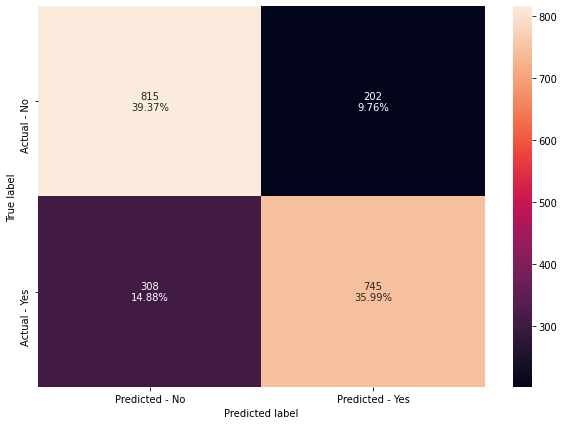

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

* Low Accuracy and recall, moreover model looks overfit.
* Highly FN rate which is 14.25%

**Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=0.7, verbosity=1)

Accuracy on training set :  0.7611847555923777
Accuracy on test set :  0.7632850241545893
Recall on training set :  0.9181969949916527
Recall on test set :  0.9097815764482431
Precision on training set :  0.6968641114982579
Precision on test set :  0.7080561714708056
F1-Score on training set :  0.7923644876643257
F1-Score on test set :  0.7963424771404821


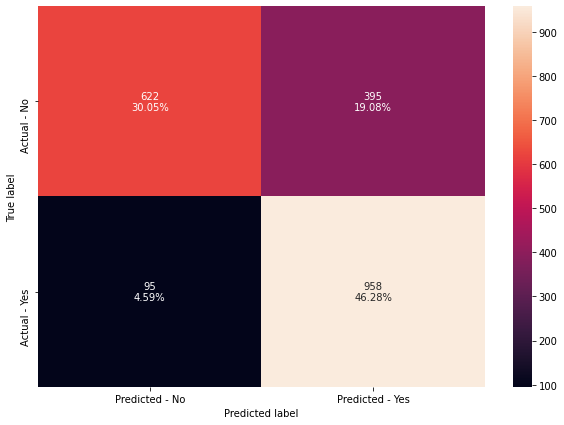

In [ ]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

* By Applying tuning parameters, model again seems overfit.
* Highly False positive and false negative values.

##**Model performance improvement - Boosting**

In Boosting models, the model AdaBoost Classifier with hyper-paramter tuning giving us good results in terms of f1 score and recall, 

F1 score,it takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution, so the f1 score and recall would be good to evaluate a model performance

**Stacking Classifier**

In [ ]:
#combining 3 algorithms into a stacking classifier
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                   

Accuracy on training set :  0.9815658657829329
Accuracy on test set :  0.9468599033816425
Recall on training set :  0.998330550918197
Recall on test set :  0.9829059829059829
Precision on training set :  0.9656842955187727
Precision on test set :  0.9183673469387755
F1-Score on training set :  0.9817360968602503
F1-Score on test set :  0.9495412844036698


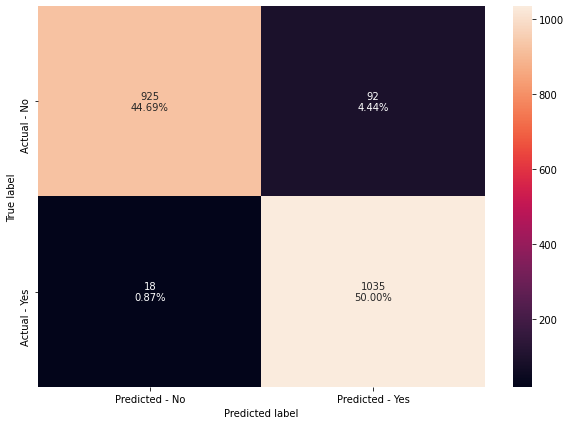

In [ ]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

* Stacking Classifier predicting goo results by combining multiple algorithms such as Ranom Forest, Decision Tree and Gradient Boosting.
* FN is very low which is 0.72%
* FP is 4.93%

**Comparing all models**

In [ ]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
12,Stacking Classifier,0.981566,0.946860,0.998331,0.982906,0.965684,0.918367,0.981736,0.949541
3,Tuned Random Forest,0.980944,0.944928,0.999583,0.990503,0.963395,0.909329,0.981155,0.948182
2,Random Forest,0.982809,0.942029,0.996244,0.983856,0.969931,0.909570,0.982911,0.945255
5,Bagging Classifier Tuned,0.977838,0.931884,0.992487,0.973409,0.963924,0.900703,0.977997,0.935646
4,Bagging Classifier,0.980737,0.928986,0.994992,0.973409,0.967140,0.895979,0.980868,0.933091
0,Decision Tree,0.982809,0.923188,0.990818,0.961064,0.974949,0.895575,0.982819,0.927164
7,Tuned AdaBoost Classifier,0.877589,0.831401,0.885643,0.838557,0.870029,0.831450,0.877766,0.834988
11,Tuned XGBoost Classifier,0.761185,0.763285,0.918197,0.909782,0.696864,0.708056,0.792364,0.796342
9,Tuned Gradient Boosting Classifier,0.823529,0.791304,0.815526,0.783476,0.826565,0.801749,0.821008,0.792507
10,XGBoost Classifier,0.775891,0.753623,0.728297,0.707502,0.801930,0.786695,0.763342,0.745000


##**Conclusion and Recommendations**

* We analyzed the "Wellness Tourism Package Modelling" using different techniques and Bagging  & Boosting methods to build a predictive model for the same.

* The model built can be used to predict if a customer is going to purchase a travel package or not.

* We were getting inaccurate results because of data was imbalanced, however we balanced the dataset using RandomOver Sampler method.

* We removed the highly multi-colinear features using stats model.

* We established the importance of hyper-parameters/ pruning to reduce overfitting in all models such Decision Tree, Random Forest, Bagging Classifier, AdaBoost Classifer and so on


* The model performance can be improved, especially in terms of precision and the Tourism  can use use the model for new customers once desired level of model performance is achieved.

* Monthly Income has a good effect on Travel Package Customers with High Income have more chances of having Purchase of Travel Package.

* Our analysis shows that it seems that customers who are Executive and Senior Manager are going to purchase travel package and Manager as well.

* People having occupation as a freelancer are more likely to purchase travel package with having a martial status as single as well.
* People who have passport are highly interested to purchase travel package.

* By Applying different algorithms of bagging and boosting, we come up with a conclusion that random forest is predicting good results in terms of f1 score and recall, and the second highest was bagging classifier as well.

* Customers to purchase a travel prediction, I think bagging classifer models can be more helpful than boosting classifers.